# 2. Import Lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import urllib.request

## Read CSV

In [2]:
def downloadurl(url_str, path):
    long_url = urllib.request.urlopen(url_str).geturl()
    urllib.request.urlretrieve(long_url, path)

downloadurl('http://trans.serveirc.com/csv/medialcostanalysis.csv', "mca.csv")

In [3]:
df = pd.read_csv("./mca.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Perform An Exploratory Data Analysis

<Axes: xlabel='bmi', ylabel='Count'>

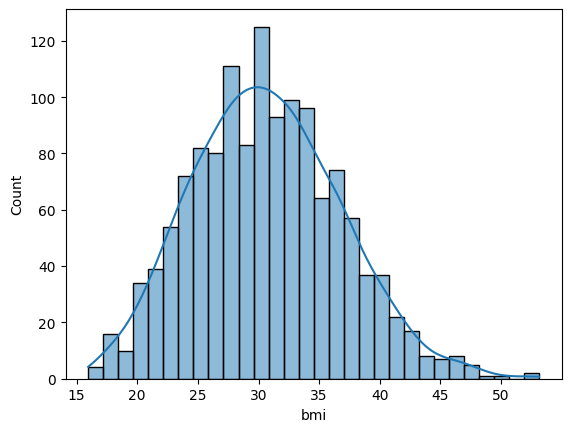

In [4]:
# Examine the distribution of Bmi (Body Mass Index)
sns.histplot(data=df, x='bmi', bins=30, kde=True)

<Axes: xlabel='smoker', ylabel='charges'>

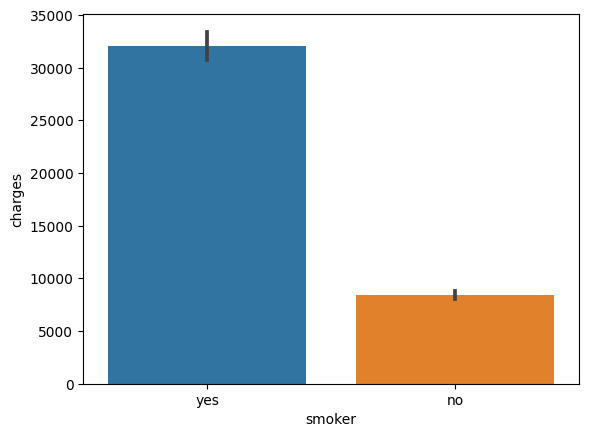

In [5]:
# Examine the relationship between “smoker” and “charges”
sns.barplot(data=df, x='smoker', y='charges')

<Axes: xlabel='smoker', ylabel='count'>

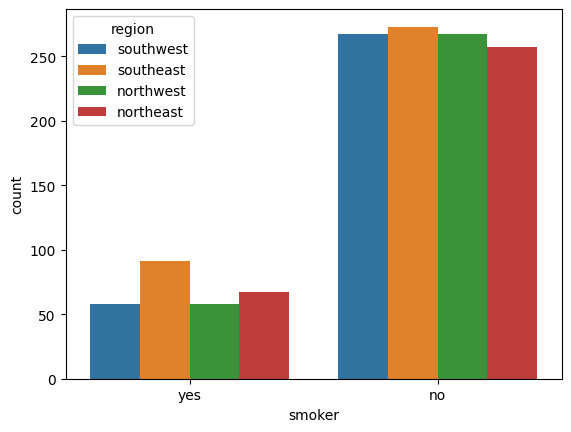

In [6]:
# Examine the relationship between “smoker” and “region”.
sns.countplot(data=df, x='smoker', hue='region')

<Axes: xlabel='bmi', ylabel='sex'>

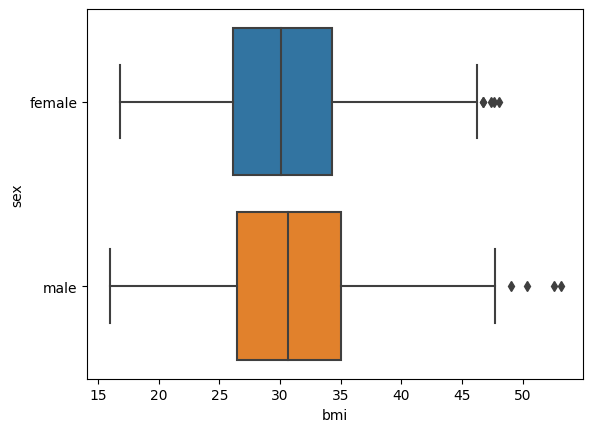

In [7]:
# Examine the relationship between “bmi” and “sex”.
sns.boxplot(data=df, x='bmi', y='sex')

<Axes: xlabel='region', ylabel='count'>

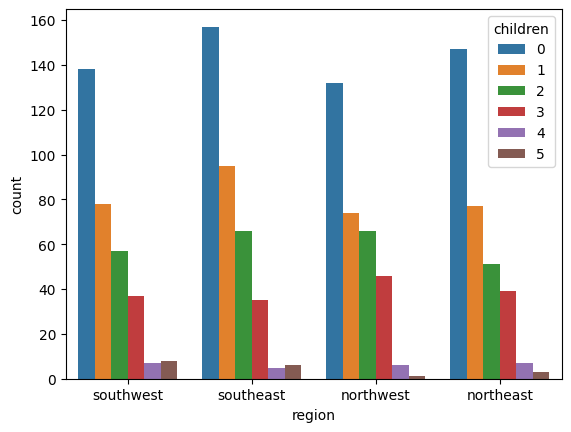

In [8]:
# Find the "region" with the most "children".
sns.countplot(data=df, x='region', hue='children')

<Axes: xlabel='age', ylabel='bmi'>

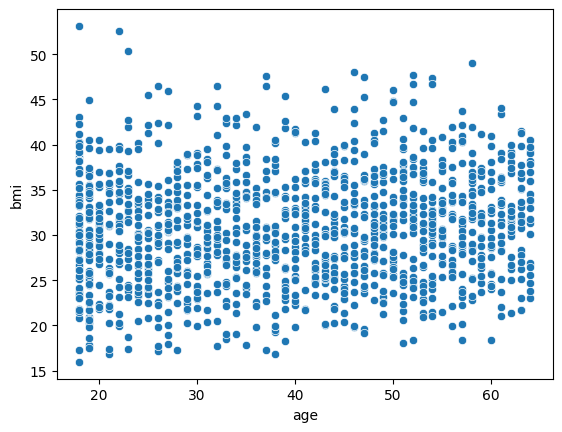

In [9]:
# Examine the relationship between “age” and “bmi”.
sns.scatterplot(data=df, x='age', y='bmi')

<Axes: xlabel='bmi', ylabel='children'>

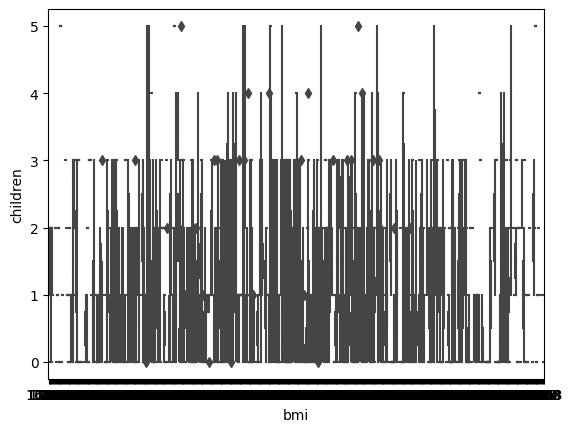

In [10]:
# Examine the relationship between “bmi” and “children”.
sns.boxplot(data=df, x='bmi', y='children')

<Axes: xlabel='bmi'>

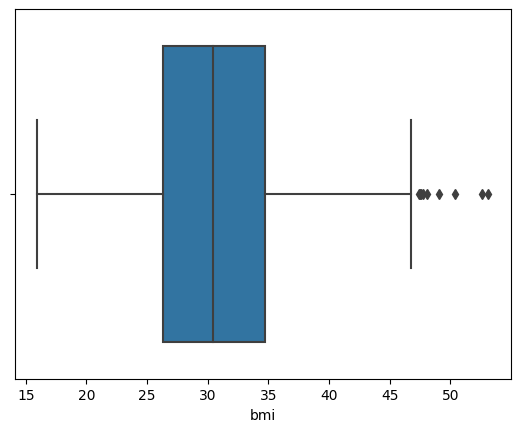

In [11]:
# Is there an outlier in the "bmi" variable? Please review.
sns.boxplot(data=df, x='bmi')

<Axes: xlabel='bmi', ylabel='charges'>

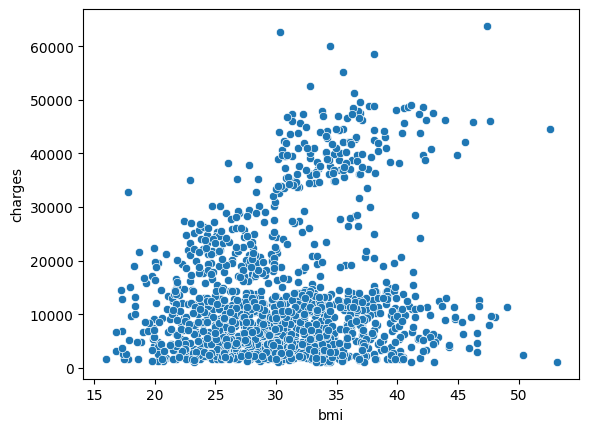

In [12]:
# Examine the relationship between “bmi” and “charges”.
sns.scatterplot(data=df, x='bmi', y='charges')

<Axes: xlabel='region', ylabel='bmi'>

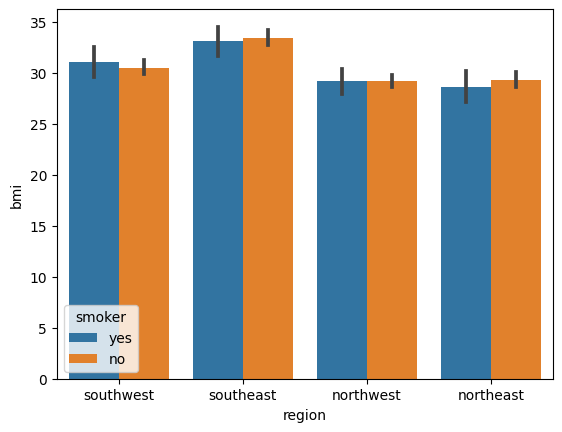

In [13]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
sns.barplot(data=df, x='region', y='bmi', hue='smoker')

# 4. Data Preprocessing

In [14]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [15]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [16]:
# Splitting dataset into train and test sets
X = df.drop(['charges'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scaling the dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[0.60869565 0.10734463 0.4        ... 1.         0.         0.        ]
 [0.63043478 0.22491256 0.         ... 0.         0.         0.        ]
 [0.73913043 0.23944041 0.         ... 0.         1.         0.        ]
 ...
 [0.86956522 0.24791499 0.         ... 0.         0.         0.        ]
 [0.41304348 0.85122411 0.4        ... 0.         0.         1.        ]
 [0.80434783 0.37503363 0.         ... 0.         0.         1.        ]]
[[0.58695652 0.24791499 0.4        ... 0.         0.         0.        ]
 [0.39130435 0.37826204 0.         ... 1.         0.         0.        ]
 [1.         0.29391983 0.         ... 1.         0.         0.        ]
 ...
 [0.43478261 0.32458972 0.2        ... 0.         0.         0.        ]
 [0.7826087  0.84611246 0.         ... 0.         1.         0.        ]
 [0.7173913  0.49071832 0.2        ... 0.         0.         1.        ]]


# 5. Model Selection

***We trained the data using different regression models and selected the model with the best results.***

In [18]:
# Creating the regression models list
regressor_list = [('Multiple Linear Regression', LinearRegression()),
                  ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
                  ('Random Forest Regression', RandomForestRegressor(n_estimators=100, random_state=42))]

In [19]:
# Training the regression models with preprocessed data
results = []
names = []
for name, regressor in regressor_list:
    cv_results = cross_val_score(regressor, X_train, y_train, cv=10, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s trained. Evaluation Metrics: Mean R2: %f, STD R2: %f' % (name, cv_results.mean(), cv_results.std()))

Multiple Linear Regression trained. Evaluation Metrics: Mean R2: 0.729741, STD R2: 0.066352
Decision Tree Regression trained. Evaluation Metrics: Mean R2: 0.649904, STD R2: 0.068695
Random Forest Regression trained. Evaluation Metrics: Mean R2: 0.819059, STD R2: 0.044954


# 6. Hyper-parameter Optimization


**We used 10-fold cross-validation to check whether a model with few features is particularly overfitting.**

**Adjusted the hyperparameters of the random forest regression model using the Grid Search method to achieve the best result with the codes found below.**

In [20]:
# Optimizing using Grid Search
rf_regressor = RandomForestRegressor()

In [21]:
param_grid = [{'n_estimators': [50, 100, 200, 300, 400, 500]},
              {'max_features': ['sqrt', 'log2']},
              {'max_depth' : [5,10,15,20,25,30]}]

In [22]:
grid_search = GridSearchCV(rf_regressor, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [50, 100, 200, 300, 400, 500]},
                         {'max_features': ['sqrt', 'log2']},
                         {'max_depth': [5, 10, 15, 20, 25, 30]}])

In [23]:
# Printing the best estimator, best parameters and best score
print("Best Score: ", grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

Best Score:  0.8463351634168464
Best Parameters:  {'max_depth': 5}


# 7. Model Evaluation

In [24]:
# Creating the best model with optimized hyper-parameters for training set
best_random_forest = RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=100)

In [25]:
# Fitting the best model with optimized hyper-parameters for training set
best_random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt')

In [26]:
# Making predictions using the test set
y_pred = best_random_forest.predict(X_test)

In [27]:
# Evaluating our model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2918.551474915516
Mean Squared Error: 23285072.588284194
Root Mean Squared Error: 4825.460867967348
